### Notebook for 80K base case

In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_mutual_info_score as AMI

NO-normed dir setting

In [2]:
# original
originaldir = "/home/tkurihana/scratch-midway2/anl/output_clustering_2000_2018_m01_band28_29_31/sklearn_agglomerative/80k"

# validation
basedatadir = "/home/tkurihana/scratch-midway2/anl/output_clustering_2000_2018_m01_band28_29_31/sklearn_agglomerative/80k/validations"

Normed dir setting

In [8]:
# original
originaldir = "/home/tkurihana/scratch-midway2/anl/output_clustering_2000_2018_m01_band28_29_31/sklearn_agglomerative/normed/80k"

# validation
basedatadir = "/home/tkurihana/scratch-midway2/anl/output_clustering_2000_2018_m01_band28_29_31/sklearn_agglomerative/nomred/80k/validations"

In [20]:
a = [1,2]
a.remove(1)
a

[2]

In [22]:
# params
bpatch = 80
ngroup = 0
gmax=80
gmin=4

# validation scale
vscales = [
    8000, 800
]
#40000, 20000, 8000, 4000, 800


# AMI scores
ami_list = []
cluster_list = [i for i in range(gmin,gmax+2,2)]

#
for i in [22, 26, 36, 52, 68, 72]:
    cluster_list.remove(i)

for iscale in vscales:
    tmp_vscale_list = []
    for icluster in cluster_list:
        tmp_ami_list = []
        for i in range(ngroup, 1,1):
        #for i in  range(ngroup): #permutations(range(ngroup),2):
            ii, jj = i, i
            idata = np.load(originaldir+'/group'+str(ii)+'/aggl_p-'+str(bpatch)+'_nc-'+str(icluster)+'_m01_b28_29_31_train_patches_labels_2000-2018_random_aggl.npy')
            jdata = np.load(basedatadir+'/group'+str(jj)+'/aggl_group'+str(i)+'_p-'+str(iscale)+'.0_nc-'+str(icluster)+'_m01_b28_29_31_cvalid_patches_labels_2000-2018_random_aggl.npy')
            #print(idata);stop
            tmp_ami_list.append(AMI(idata[:len(jdata)], jdata))
        tmp_vscale_list.append(tmp_ami_list)
    ami_list.append(tmp_vscale_list)

In [8]:
# mean list
mean_amis = []
min_amis = []
max_amis = []
for i in ami_list:
    means, maxs, mins = [],[],[]
    for icluster in i :
        #mean
        _mean = np.mean(icluster)

        # max list
        _max = np.max(icluster)

        # min list
        _min = np.min(icluster)
   
        #
        means.append(_mean)
        maxs.append(_max)
        mins.append(_min)

    mean_amis.append(means)
    max_amis.append(maxs)
    min_amis.append(mins)

/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/tkurihana/.conda/envs/tf-cpu/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation maximum which has no identity

### 2 group

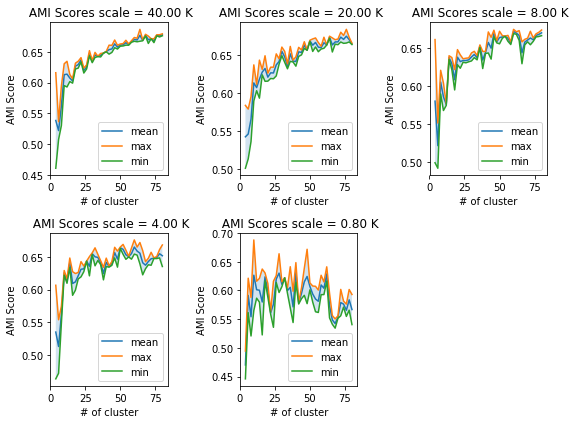

In [7]:
fig = plt.figure(figsize=(8,6))

for idx, (_mean_amis, _max_amis, _min_amis) in enumerate(zip(mean_amis, max_amis, min_amis)):
    ax = plt.subplot(2,3,idx+1)
    plt.plot(cluster_list, _mean_amis, label='mean')
    plt.plot(cluster_list, _max_amis, label='max')
    plt.plot(cluster_list, _min_amis, label='min')
    plt.fill_between(cluster_list, _max_amis, _min_amis, alpha=0.2)
    ax.set_xlabel('# of cluster')
    ax.set_ylabel('AMI Score')
    ax.set_title(" AMI Scores scale = %0.2f K" % round(vscales[idx]/1000, 2) )
    plt.legend()
    
fig.tight_layout()
plt.show()

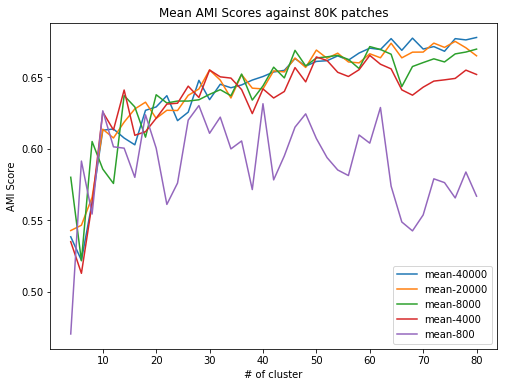

In [9]:
fig = plt.figure(figsize=(8,6))

for idx, _mean_amis in enumerate(mean_amis):
    plt.plot(cluster_list, _mean_amis, label='mean-'+str(int(vscales[idx]) ) )
plt.xlabel('# of cluster')
plt.ylabel('AMI Score')
    #ax.set_title(" AMI Scores scale = %0.2f K" % round(vscales[idx]/1000, 2) )
plt.legend()
plt.title("Mean AMI Scores against 80K patches")
plt.show()

### 4 Group

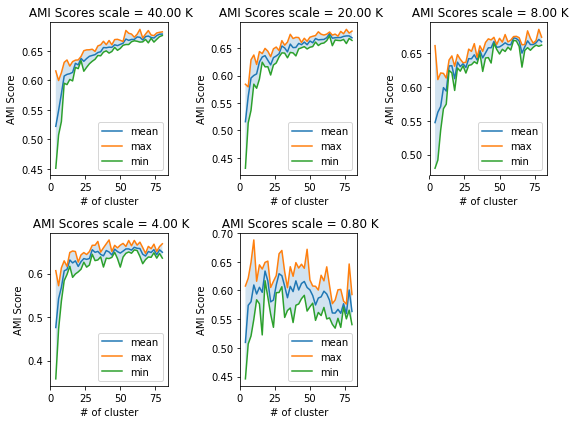

In [7]:
fig = plt.figure(figsize=(8,6))

for idx, (_mean_amis, _max_amis, _min_amis) in enumerate(zip(mean_amis, max_amis, min_amis)):
    ax = plt.subplot(2,3,idx+1)
    plt.plot(cluster_list, _mean_amis, label='mean')
    plt.plot(cluster_list, _max_amis, label='max')
    plt.plot(cluster_list, _min_amis, label='min')
    plt.fill_between(cluster_list, _max_amis, _min_amis, alpha=0.2)
    ax.set_xlabel('# of cluster')
    ax.set_ylabel('AMI Score')
    ax.set_title(" AMI Scores scale = %0.2f K" % round(vscales[idx]/1000, 2) )
    plt.legend()
    
fig.tight_layout()
plt.show()

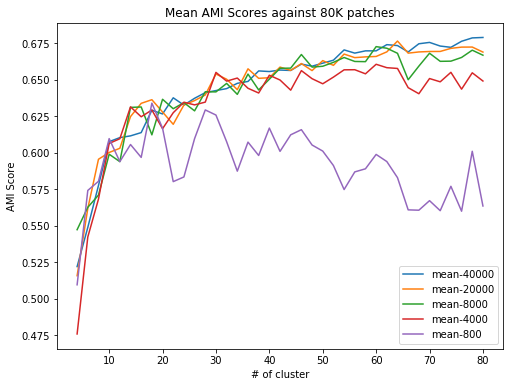

In [8]:
fig = plt.figure(figsize=(8,6))

for idx, _mean_amis in enumerate(mean_amis):
    plt.plot(cluster_list, _mean_amis, label='mean-'+str(int(vscales[idx]) ) )
plt.xlabel('# of cluster')
plt.ylabel('AMI Score')
    #ax.set_title(" AMI Scores scale = %0.2f K" % round(vscales[idx]/1000, 2) )
plt.legend()
plt.title("Mean AMI Scores against 80K patches")
plt.show()

-------------
## Normed version

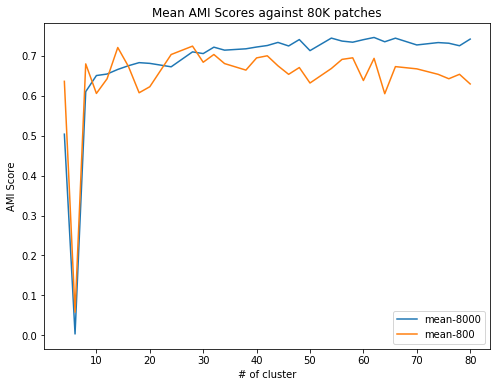

In [24]:
fig = plt.figure(figsize=(8,6))


#for i in [22, 26, 36, 52, 68, 72]:
#    cluster_list.remove(i)

for idx, iami in enumerate(ami_list):
    plt.plot(cluster_list, iami, label='mean-'+str(int(vscales[idx]) ) )
plt.xlabel('# of cluster')
plt.ylabel('AMI Score')
    #ax.set_title(" AMI Scores scale = %0.2f K" % round(vscales[idx]/1000, 2) )
plt.legend()
plt.title("Mean AMI Scores against 80K patches")
plt.show()

In [27]:
for i, j in zip(cluster_list, ami_list[0]):
    print(i,j)

4 [0.5034027390674171]
6 [0.0037106535501124287]
8 [0.609799293094131]
10 [0.6500292989085171]
12 [0.6538058136290663]
14 [0.66529739178211]
16 [0.6745716899858646]
18 [0.6822945878771565]
20 [0.6804531552024149]
24 [0.671885024627286]
28 [0.7092171361968469]
30 [0.7049488017820222]
32 [0.7209966758477301]
34 [0.7135287616463367]
38 [0.7168990040394049]
40 [0.7213602690042206]
42 [0.7250923366803173]
44 [0.7328613156070592]
46 [0.7240082330387614]
48 [0.7400076031189942]
50 [0.7123307636817113]
54 [0.7436799136457319]
56 [0.7362064464209938]
58 [0.7334047831232675]
60 [0.7397302079638672]
62 [0.7452574913631088]
64 [0.734491436860668]
66 [0.7435113370975601]
70 [0.7265166677867876]
74 [0.7324629361652499]
76 [0.7308603748686463]
78 [0.7245435157092538]
80 [0.7411910837924855]
